In [1]:
import numpy as np

In [2]:
import pickle

In [3]:
from aemulusnu_massfunction.utils import *
from aemulusnu_massfunction.fisher_utils import *

loading emulator from /oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_loBox0_1400.pkl


In [4]:
#https://github.com/tmcclintock/Aemulus_data/blob/e4a2b28571cfba99d8ceda8913fb6e2fd42ab6f3/aemulus_data/building_box_cosmologies.txt
line1 = "# ombh2 omch2 w0 ns ln10As H0 Neff sigma8"
line2 = "2.268324999999999855e-02 1.140598000000000029e-01 -8.165972000000000230e-01 9.755890000000000395e-01 3.092918000000000056e+00 6.336569000000000074e+01 2.918750000000000178e+00 7.730715000000000225e-01"

In [5]:
columns = [col for col in line1.split()[1:]]
cosmo  = dict(zip(columns, np.array(line2.split(), dtype=np.float64)))
print(cosmo)
box = 'Box000'

{'ombh2': 0.02268325, 'omch2': 0.1140598, 'w0': -0.8165972, 'ns': 0.975589, 'ln10As': 3.092918, 'H0': 63.36569, 'Neff': 2.91875, 'sigma8': 0.7730715}


In [6]:
curr_run_fname = "/oak/stanford/orgs/kipac/aemulus/aemulus_alpha/" + box + "/";


NvM_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alpha_check/'+curr_run_fname.split('/')[-2]+'_NvsM.pkl'
NvM_f = open(NvM_fname, 'rb')
NvMs = pickle.load(NvM_f) #NvMs is a dictionary of dictionaries
NvM_f.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


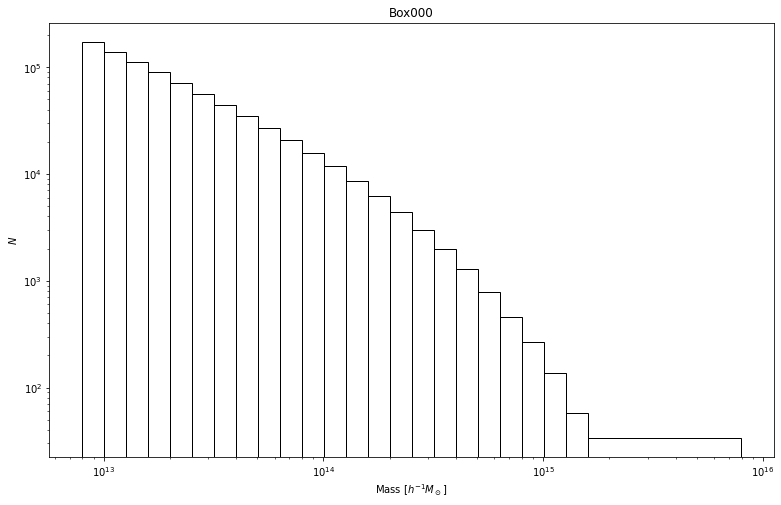

In [7]:
aC = 1.00
N = NvMs[aC]['N']
ep = NvMs[aC]['edge_pairs']
bin_edge = [epc[0] for epc in ep]
bin_edge += [ep[-1][1]]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))

ax.bar(x=bin_edge[:-1], height=N, width=np.diff(bin_edge), align='edge', fill=False)#, label=r'$a=%.2f$'%(a))

ax.set_title(curr_run_fname.split('/')[-2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Mass $[h^{-1}M_\odot]$')
ax.set_ylabel(r'$N$')
ax.legend(frameon=False)


In [8]:
print(cosmo)

{'ombh2': 0.02268325, 'omch2': 0.1140598, 'w0': -0.8165972, 'ns': 0.975589, 'ln10As': 3.092918, 'H0': 63.36569, 'Neff': 2.91875, 'sigma8': 0.7730715}


In [9]:
#https://github.com/tmcclintock/aemulus_simulation_testing/blob/5edd3b7c30d87f0f715ec974e666ecedd5d48059/bfs/bf_dfg_box0.txt
bf_params = {
    'd0':2.4,
    'd1':2.181047599569275963e+00,
    'e0':8.533560474520303085e-01,
    'e1':4.482167434789784966e-01,
    'f0':2.117323359155323381e-01,
    'f1':0.12,
    'g0':1.308324286279444193e+00,
    'g1':3.444272270175428030e-01
}

#https://github.com/tmcclintock/aemulus_simulation_testing/blob/5edd3b7c30d87f0f715ec974e666ecedd5d48059/bf_defg_box0.txt
bf_params = {
'd0': 2.174821518616466776e+00,
'd1': 2.866865716329323743e-01,
'e0': 9.956259364301934811e-01,
'e1': 2.616888864012535953e-01,
'f0': 4.488975264972323020e-01,
'f1': 1.129116545674591771e-01,
'g0': 1.308036208759035368e+00,
'g1':3.008737013596629595e-01,
}

In [10]:

jackknife_covs_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alpha_check/'+curr_run_fname.split('/')[-2]+'_jackknife_covs.pkl'
jackknife_covs_f = open(jackknife_covs_fname, 'rb')
jackknife = pickle.load(jackknife_covs_f)
jackknife_covs_f.close()



jack_covs = {a:jackknife[a][1] for a in NvMs}

# Compute the weighted covariance matrix incorporating jackknife and poisson
weighted_cov = {a: jack_covs[a] for a in jack_covs}

# Inverse of the weighted covariance matrix
inv_weighted_cov = {a:np.linalg.inv(weighted_cov[a])  for a in weighted_cov}  
scale_cov = {a:np.log(np.linalg.det(weighted_cov[a])) for a in weighted_cov}

In [11]:
# import pyccl 
# import MiraTitanHMFemulator

# Ommh2 = cosmo['ombh2'] + cosmo['omch2']
# HMFemu = MiraTitanHMFemulator.Emulator()
# Omnuh2 = pyccl.neutrinos.Omeganuh2(1, m_nu=[0,0,0], T_CMB=2.7255)
# print(Omnuh2)
# fiducial_cosmo = {'Ommh2': Ommh2,
#                   'Ombh2': cosmo['ombh2'],
#                   'Omnuh2': Omnuh2,
#                   'n_s': cosmo['ns'],
#                   'h': cosmo['H0']/100,
#                   'w_0': cosmo['w0'],
#                   'w_a': 0,
#                   'sigma_8': cosmo['sigma8'],
#                  }



In [12]:
cosmo

{'ombh2': 0.02268325,
 'omch2': 0.1140598,
 'w0': -0.8165972,
 'ns': 0.975589,
 'ln10As': 3.092918,
 'H0': 63.36569,
 'Neff': 2.91875,
 'sigma8': 0.7730715}

In [13]:
# import pyccl as ccl
# # cosmo = cosmo_params[box]
# h = cosmo['H0']/100
# cosmo_dict = {
#     'h': h,
#     'Omega_b': cosmo['ombh2'] / h**2,
#     'Omega_c': cosmo['omch2'] / h**2,
#     'w0': cosmo['w0'],
#     'wa': 0.0,
#     'A_s': np.exp(cosmo['ln10As'])/(10**10),
#     'm_nu': 0,
#     'T_CMB': 2.7255, 
#     'n_s': cosmo['ns'],
# }

# ccl_cosmo = ccl.Cosmology(**cosmo_dict)

In [14]:
from aemulusnu_massfunction.massfunction import *

In [15]:
cosmo

{'ombh2': 0.02268325,
 'omch2': 0.1140598,
 'w0': -0.8165972,
 'ns': 0.975589,
 'ln10As': 3.092918,
 'H0': 63.36569,
 'Neff': 2.91875,
 'sigma8': 0.7730715}

In [16]:
cosmo['nu_mass_ev'] = 0
cosmo['10^9 As'] = np.exp(cosmo['ln10As'])/1e10 * 1e9

In [17]:
# LOOKING_AT = [a_RUN]
from tqdm import trange, tqdm

N_data = {}
M_data = {}
aux_data = {}
from scipy.interpolate import interp1d

vol = -1 #comoving Mpc^3/h^3
Mpart = -1

for a in tqdm(NvMs):
#     if(a not in LOOKING_AT):
#         continue
    c_data = NvMs[a]
    
    Ms = c_data['M'] #units of h^-1 Msolar
    N = c_data['N']
    edge_pairs = c_data['edge_pairs']
    assert(len(Ms) == len(edge_pairs))
    assert(len(Ms) == len(N))
    

    if(vol==-1):
        vol = c_data['vol']
    assert(vol == c_data['vol'])

    if(Mpart==-1):
        Mpart = c_data['Mpart']
    assert(Mpart == c_data['Mpart'])

    N_data[a] = []
    M_data[a] = []
    aux_data[a] = []
    for N_curr, M_curr, edge_pair in zip(N, Ms, edge_pairs):
        N_data[a] += [N_curr]
        M_data[a] += [M_curr]
        aux_data[a] += [{'a':a, 'edge_pair':edge_pair}]


100%|██████████| 10/10 [00:00<00:00, 4910.79it/s]


In [18]:
mf = MassFunction(cosmo)


In [19]:
M_numerics = np.logspace(np.log10(100*Mpart), 16, 100) #h^-1 Msolar


In [20]:
def p(a, p0, p1):
    oup = (p0)+(a-0.5)*(p1)
    return oup

In [21]:
print(bf_params)

{'d0': 2.1748215186164668, 'd1': 0.2866865716329324, 'e0': 0.9956259364301935, 'e1': 0.2616888864012536, 'f0': 0.4488975264972323, 'f1': 0.11291165456745918, 'g0': 1.3080362087590354, 'g1': 0.30087370135966296}


In [22]:
import pyccl as ccl
# cosmo = cosmo_params[box]
h = cosmo['H0']/100
cosmo_dict = {
    'h': h,
    'Omega_b': cosmo['ombh2'] / h**2,
    'Omega_c': cosmo['omch2'] / h**2,
    'w0': cosmo['w0'],
    'wa': 0.0,
    'A_s': np.exp(cosmo['ln10As'])/(10**10),
    'm_nu': 0,
    'T_CMB': 2.7255, 
    'n_s': cosmo['ns'],
}

ccl_cosmo = ccl.Cosmology(**cosmo_dict)

In [23]:
from pyccl.halos.halo_model_base import MassFunc

class MassFuncAemulusNu(MassFunc):
    """
    """
    name = 'AemulusNu'

    def __init__(self, *,
                 mass_def="200m",
                 mass_def_strict=True):
        super().__init__(mass_def=mass_def, mass_def_strict=mass_def_strict)

    def _check_mass_def_strict(self, mass_def):
        return mass_def.Delta == "fof"

    def _setup(self):
        self.bf_params = bf_params
        
    def B(self, a, M, σM, d, e, f, g):
        oup = e**(d)*g**(-d/2)*gamma(d/2)
        oup += g**(-f/2)*gamma(f/2)
        oup = 2/oup
        return oup


    def f_G(self, a, M, σM, d, e, f, g):
        oup = self.B(a, M, σM, d, e, f, g)
        oup *= ((σM/e)**(-d)+σM**(-f))
        oup *= np.exp(-g/σM**2)
        return oup

    def _get_fsigma(self, cosmo, sigM, a, lnM):
        d = p(a, bf_params['d0'], bf_params['d1'])
        e = p(a, bf_params['e0'], bf_params['d1'])
        f = p(a, bf_params['f0'], bf_params['f1'])
        g = p(a, bf_params['g0'], bf_params['g1'])

        return self.f_G(a, np.exp(lnM), sigM, d, e, f, g)

{'d': 2.318164804432933, 'e': 1.1264703796308202, 'f': 0.5053533537809619, 'g': 1.4584730594388668}
1157625000.0
[1.02643975 1.02880925 1.031594   1.03487063 1.03875838 1.04338541
 1.04891409 1.05553784 1.06352284 1.07320025 1.08496857 1.09931018
 1.11690316 1.1385387  1.16524426 1.19835207 1.23958698 1.29131758
 1.35659246 1.43968106 1.54655062 1.68568602 1.86963619 2.27127433]


/tmp/ipykernel_16843/52824037.py:121: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  axs[1].axhline(0, c='black')


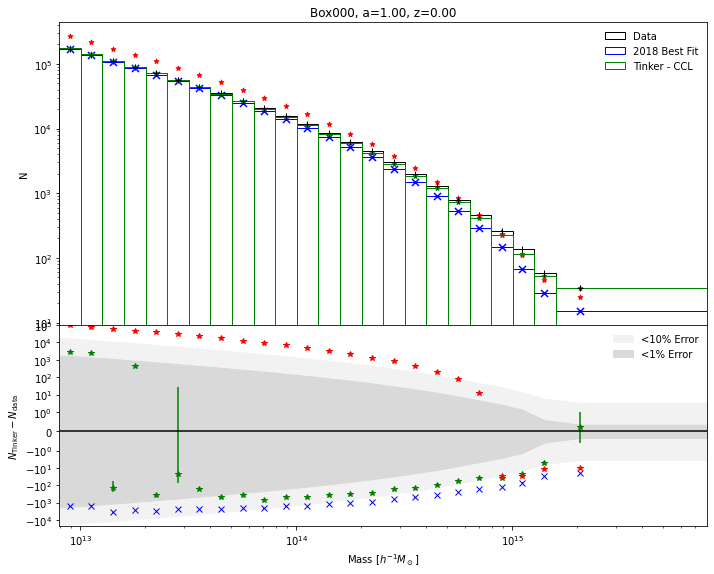

{'d': 2.2921024148923546, 'e': 1.1026805046569688, 'f': 0.49508866817588876, 'g': 1.4311209321219613}
1157625000.0
[1.03251946 1.03536997 1.03863424 1.04239228 1.04676755 1.05189319
 1.05793751 1.06510104 1.07365856 1.08395173 1.09639123 1.11147418
 1.1298975  1.15247477 1.18026238 1.21462877 1.25734686 1.31085003
 1.37827166 1.4640008  1.57417018 1.71750644 2.03164031]


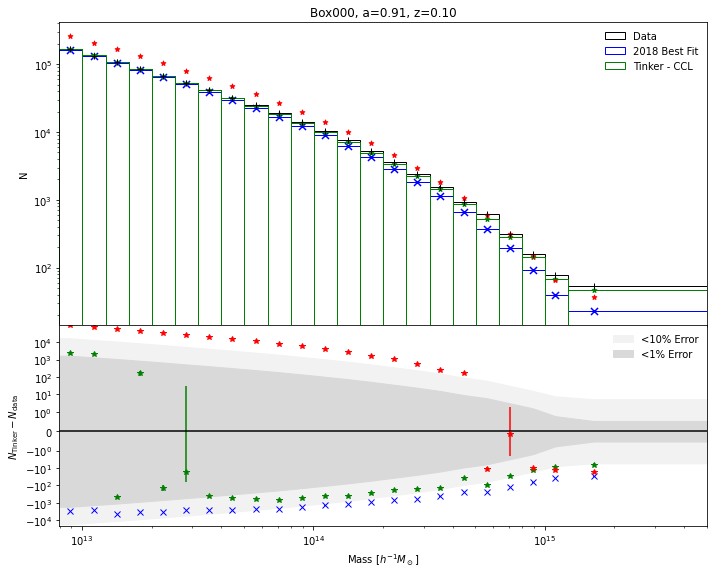

{'d': 2.2608274901063465, 'e': 1.0741326023505695, 'f': 0.4827710228674701, 'g': 1.3982983191669343}
1157625000.0
[1.03910733 1.04237638 1.04605568 1.05023147 1.05503483 1.06060775
 1.06712908 1.07481193 1.08394593 1.09489085 1.1080783  1.12403092
 1.14347762 1.16727069 1.19651671 1.23264738 1.27752077 1.333686
 1.40443181 1.49436961 1.60994694 1.85706093]


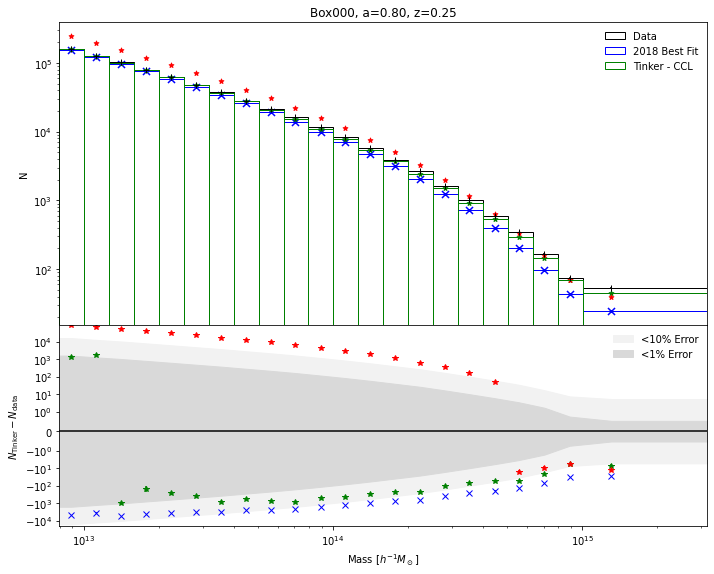

{'d': 2.2362544373054014, 'e': 1.0517022011415724, 'f': 0.47309291330787484, 'g': 1.3725092307285922}
1157625000.0
[1.04302434 1.04646954 1.05032642 1.05468896 1.05969752 1.06550481
 1.07230227 1.08031803 1.08985926 1.10130694 1.11511747 1.13184382
 1.15225275 1.17724317 1.20798264 1.24598063 1.29320136 1.35233951
 1.42688368 1.52173461 1.72134559]


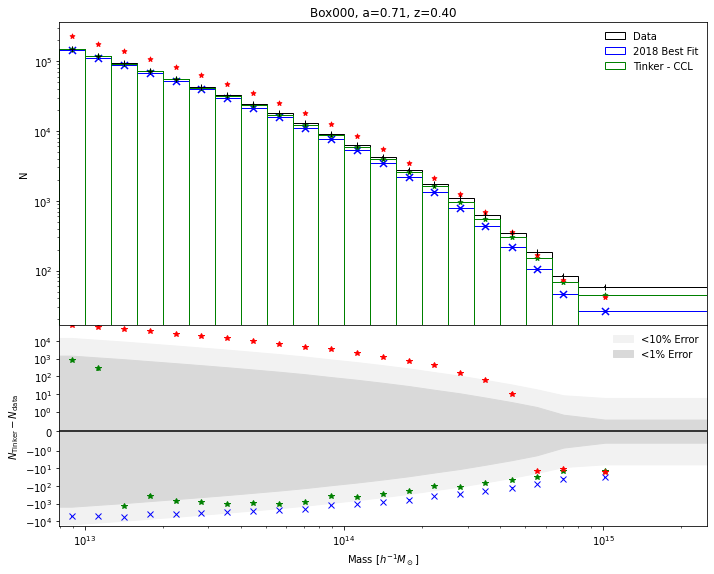

{'d': 2.2164372280412747, 'e': 1.033612956869086, 'f': 0.46528789518589925, 'g': 1.3517113361221054}
1157625000.0
[1.04446501 1.04790504 1.05176295 1.05614135 1.06119066 1.06707518
 1.07399987 1.08220881 1.09202769 1.10385985 1.1181878  1.13559668
 1.15689326 1.18302634 1.21522914 1.25509562 1.30470647 1.36691728
 1.44544051 1.54550391 1.73997814]


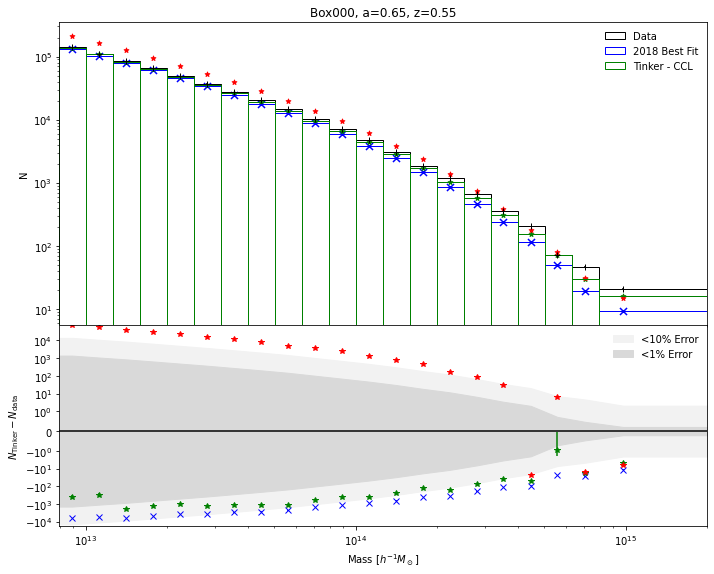

{'d': 2.2001173082644985, 'e': 1.018716055321808, 'f': 0.45886028633799203, 'g': 1.3345837997985053}
1157625000.0
[1.04365249 1.04696264 1.05070257 1.05498405 1.05996799 1.06583066
 1.07279088 1.08110906 1.09112967 1.1032788  1.11806551 1.13610795
 1.15825385 1.18550373 1.21915942 1.26090377 1.31294129 1.3782998
 1.46093404 1.61412175]


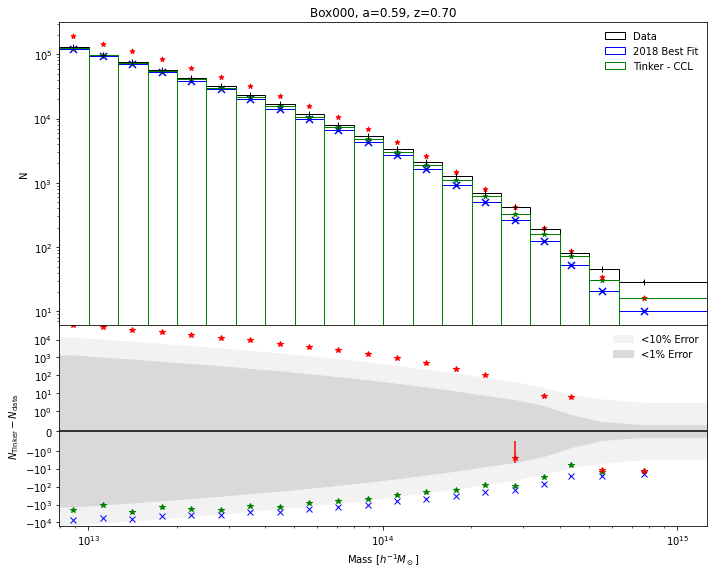

{'d': 2.1864440789170376, 'e': 1.0062350655737866, 'f': 0.45347507788505165, 'g': 1.3202339294858574}
1157625000.0
[1.04077327 1.04386544 1.04740441 1.05151118 1.0563571  1.06213029
 1.06906315 1.07743209 1.08759987 1.10001476 1.11521173 1.13384139
 1.15679189 1.18511515 1.22018189 1.2637647  1.31819449 1.3866759
 1.5127882 ]


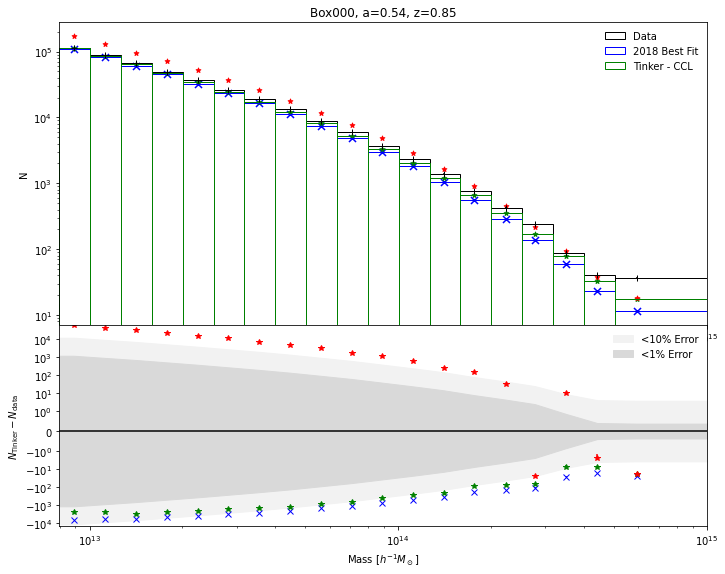

{'d': 2.1748215186164668, 'e': 0.9956259364301935, 'f': 0.4488975264972323, 'g': 1.3080362087590354}
1157625000.0
[1.03605371 1.03887227 1.04215937 1.04604515 1.05071106 1.05635664
 1.06322734 1.0716149  1.08189952 1.09455072 1.11012836 1.12931447
 1.15303641 1.18239654 1.2188338  1.2642101  1.32098349 1.42528821]


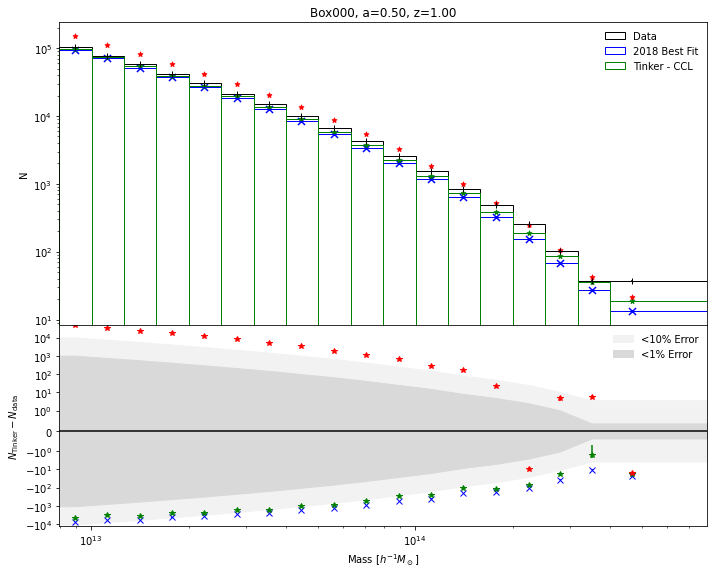

In [26]:
from scipy.interpolate import interp1d
i=0
#TODO HALO TOOLS M200c to M200b
for a in reversed(NvMs.keys()):
    z = scaleToRedshift(a)
    if(z>=2):
        break
    fig1 = plt.figure(figsize =(12, 7))

    axs=[fig1.add_axes((0.2,0.4,.75,.6)), fig1.add_axes((0.2,0.0,.75,.4))]
    plt.subplots_adjust(wspace=0, hspace=0)
    c_data = NvMs[a]
    
    Ms = M_data[a]
    N = N_data[a]
    edge_pairs = c_data['edge_pairs']
    
    edges = [edge[0] for edge in edge_pairs]
    edges += [edge_pairs[-1][1]]


    vol = vol
    dM = np.array([edges[1]-edges[0] for edges in edge_pairs])
    dndM = (np.array(N)/vol)/dM
    
    yerr = np.sqrt(np.diagonal(weighted_cov[a]))
    
    #evaluating 2018 Best fit
    curr_params = {'d':0, 'e':0, 'f':0, 'g':0}
    for key in curr_params:
        curr_params[key] = p(a, bf_params[key+'0'], bf_params[key+'1'])
    print(curr_params)
    print(vol)
    
    tinker_eval_MCMC = [mf.dndM(a, M_c,**curr_params,)*vol for M_c in M_numerics]
    f_dndM_MCMC_LOG = interp1d(np.log10(M_numerics), tinker_eval_MCMC, kind='cubic', bounds_error=False, fill_value=0.)
    f_dndM_MCMC = lambda x:f_dndM_MCMC_LOG(np.log10(x))
    tinker_eval_MCMC = np.array([quad(f_dndM_MCMC, edge[0],  edge[1], epsabs=0, epsrel=1e-4)[0] for edge in edge_pairs])

#     #evaluating Mira-Titan
#     M_numerics_MT =np.logspace(13, 16, 100)
#     MT_eval = np.array(HMFemu.predict(fiducial_cosmo, z, M_numerics_MT))[0]/M_numerics_MT
#     f_dndM_MT_LOG = interp1d(np.log10(M_numerics_MT), MT_eval, 
#                            kind='cubic', bounds_error=False, fill_value=0.)
#     #NOTE Mira-Titan gives as function of M200c, not M200b like us
#     f_dndM_MT_M200b = lambda M200b:f_dndM_MT_LOG(np.log10(M200b/0.3))
#     MT_eval = np.array([vol*quad(f_dndM_MT_M200b, 
#                                  (edge[0]),  
#                                  (edge[1]))[0] for edge in edge_pairs])
    hmf = MassFuncAemulusNu(mass_def='200m', mass_def_strict=True)
    tinker_eval_CCL = hmf(ccl_cosmo, M_numerics/h, a)*vol/(h**4 * M_numerics * np.log(10)) # dn/dM 
    f_dndM_CCL_LOG = interp1d(np.log10(M_numerics), tinker_eval_CCL, kind='cubic', bounds_error=False, fill_value=0.)
    f_dndM_CCL = lambda x:f_dndM_CCL_LOG(np.log10(x))
    CCL_evaled = np.array([quad(f_dndM_CCL, (edge[0]),  (edge[1]), epsabs=0, epsrel=1e-4)[0] for edge in edge_pairs])
    

    
#     #from CCL
    hmf = ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False)
    tinker_eval_CCL = hmf(ccl_cosmo, M_numerics, a)*vol/h**3 # dn/dlog10 
    f_dndM_CCL_LOG = interp1d(np.log10(M_numerics), tinker_eval_CCL, kind='cubic', bounds_error=False, fill_value=0.)
    tinker_eval_CCL = np.array([quad(f_dndM_CCL_LOG, np.log10(edge[0]/h),  np.log10(edge[1]/h))[0] for edge in edge_pairs])
    print(tinker_eval_CCL/ tinker_eval_MCMC)
    
    color = plt.colormaps["rainbow"]((i+1)/len(N_data.keys()))[:-1]

    

    axs[0].errorbar(Ms, N, yerr, fmt='+', c='black')
    axs[0].scatter(Ms, tinker_eval_MCMC, s=50 , marker='x', c='blue')
#     axs[0].scatter(Ms, MT_eval, s=25 , marker='o', c='red')
    axs[0].scatter(Ms, tinker_eval_CCL, s=25 , marker='*', c='green')
    axs[0].scatter(Ms, CCL_evaled, s=25 , marker='*', c='red')

    edges = np.array(edges)
    tmp = 0# edges[:-1]*10**(0.01)-edges[:-1]
    axs[0].bar(x=edges[:-1], height=N, width=np.diff(edges),
               align='edge', fill=False, ec='black', label='Data')
    axs[0].bar(x=edges[:-1], height=tinker_eval_MCMC, width=np.diff(edges), align='edge', fill=False, ec='blue', label='2018 Best Fit')
#     axs[0].bar(x=edges[:-1]-tmp, height=MT_eval, width=np.diff(edges), align='edge', fill=False, 
#                ec='red', label='Mira-Titan')
    axs[0].bar(x=edges[:-1], height=tinker_eval_CCL, width=np.diff(edges), align='edge', fill=False, 
               ec='green', label='Tinker - CCL')

    axs[1].errorbar(Ms, (tinker_eval_MCMC-N), yerr, fmt='x', color='blue')
#     axs[1].errorbar(Ms, (MT_eval-N), yerr, fmt='o', color='red')
    axs[1].errorbar(Ms, (tinker_eval_CCL-N), yerr, fmt='*', color='green')
    axs[1].errorbar(Ms, (CCL_evaled-N), yerr, fmt='*', color='red')

    y1 = 0.1*np.array(N)
    y1 = np.append(y1, y1[-1])
    y1 = np.append(y1[0], y1)

    y2 = -0.1*np.array(N)
    y2 = np.append(y2, y2[-1])
    y2 = np.append(y2[0], y2)

    c_Ms = np.append(Ms, edges[-1])
    c_Ms = np.append(edges[0], c_Ms)
    axs[1].fill_between(c_Ms, y1, y2, alpha=1, color='0.95',label='<10% Error')

    y1 = 0.01*np.array(N)
    y1 = np.append(y1, y1[-1])
    y1 = np.append(y1[0], y1)

    y2 = -0.01*np.array(N)
    y2 = np.append(y2, y2[-1])
    y2 = np.append(y2[0], y2)
    
    axs[1].fill_between(c_Ms, y1, y2, alpha=1, color='0.85',label='<1% Error')
    

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].legend(frameon=False)
    axs[0].set_ylabel('N')

    axs[1].set_xscale('log')
    axs[1].set_yscale('symlog', linthresh=1)    
    axs[1].legend(frameon=False)
    axs[1].axhline(0, c='black')
    axs[1].set_ylabel('N')
    axs[1].set_xlabel(r'Mass $[h^{-1}M_\odot]$')
    axs[1].set_ylabel(r'${N_{\rm Tinker}-N_{\rm data}} $')
    axs[0].set_title('%s, a=%.2f, z=%.2f'%(box, a, z))
    i+=1
    
    axs[0].set_xlim((200*Mpart, np.max(edges)))
    axs[1].set_xlim((200*Mpart, np.max(edges)))

#     plt.savefig('/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/figures/alpha_check_%s_ML+MCMCFits_a%.2f.pdf'%(box, a), bbox_inches='tight')
    plt.show()
